In [1]:
#importing required libraries
%matplotlib inline
import os
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import folium
import geopy
import geocoder
import requests
from pandas.io.json import json_normalize
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Libraries imported')

Libraries imported


## Scraping pincodes and post offices  in Banglore

In [3]:
#scraping makaan.in for housing prices
df=pd.DataFrame(columns=['Name','Price range per sqft','Avg price per sqft','Price rise','Trend','View Properties'])
res=pd.read_html('https://www.makaan.com/price-trends/property-rates-for-buy-in-delhi',header=1)
res[0].columns=['Name','Price range per sqft','Avg price per sqft','Price rise','Trend','View Properties']
df=df.append(res[0],ignore_index=True)
for n in np.arange(2,59):
    res=pd.read_html('https://www.makaan.com/price-trends/property-rates-for-buy-in-delhi?page={}'.format(n),header=1)
    res[0].columns=['Name','Price range per sqft','Avg price per sqft','Price rise','Trend','View Properties']
    df=df.append(res[0],ignore_index=True)

In [4]:
df

,Name,Price range per sqft,Avg price per sqft,Price rise,Trend,View Properties
0,Uttam Nagar,"843 - 13,333 / sqft","7,486 / sqft",5.4%,See trend,View 468 properties
1,Uttam Nagar west,"996 - 11,548 / sqft","6,762.32 / sqft",-25.7%,See trend,View 98 properties
2,Malviya Nagar,"2,310 - 14,222 / sqft","11,703.7 / sqft",41.1%,See trend,View 12 properties
3,laxmi nagar,"2,353 - 13,889 / sqft","11,858.86 / sqft",-16.3%,See trend,View 588 properties
4,Greater kailash 1,"2,900 - 43,333 / sqft","17,797.51 / sqft",-15%,See trend,View 8 properties
5,Saket,"3,435 - 18,621 / sqft","13,995.16 / sqft",-7%,See trend,View 53 properties
6,Defence Colony,"758 - 35,484 / sqft","20,939.86 / sqft",21.8%,See trend,View 25 properties
7,Safdarjung Enclave,"6,500 - 29,423 / sqft","21,743.02 / sqft",-20.9%,See trend,View 12 properties
8,Vasant Kunj,"2,165 - 1,85,714 / sqft","68,576.87 / sqft",7%,See trend,View 248 properties
9,Greater Kailash II,"3,343 - 18,765 / sqft","16,788.9 / sqft",53.4%,See trend,View 9 properties


In [5]:
#removing unecessary columns price range per sqft, trends,price rise,view properties
df.drop(['Price range per sqft','Price rise','Trend','View Properties'],axis=1,inplace=True)
df

,Name,Avg price per sqft
0,Uttam Nagar,"7,486 / sqft"
1,Uttam Nagar west,"6,762.32 / sqft"
2,Malviya Nagar,"11,703.7 / sqft"
3,laxmi nagar,"11,858.86 / sqft"
4,Greater kailash 1,"17,797.51 / sqft"
5,Saket,"13,995.16 / sqft"
6,Defence Colony,"20,939.86 / sqft"
7,Safdarjung Enclave,"21,743.02 / sqft"
8,Vasant Kunj,"68,576.87 / sqft"
9,Greater Kailash II,"16,788.9 / sqft"


In [6]:
#dropping rows with - as their avg price per sqft
df=df[df['Avg price per sqft']!='-'].reset_index(drop=True)
df

,Name,Avg price per sqft
0,Uttam Nagar,"7,486 / sqft"
1,Uttam Nagar west,"6,762.32 / sqft"
2,Malviya Nagar,"11,703.7 / sqft"
3,laxmi nagar,"11,858.86 / sqft"
4,Greater kailash 1,"17,797.51 / sqft"
5,Saket,"13,995.16 / sqft"
6,Defence Colony,"20,939.86 / sqft"
7,Safdarjung Enclave,"21,743.02 / sqft"
8,Vasant Kunj,"68,576.87 / sqft"
9,Greater Kailash II,"16,788.9 / sqft"


In [7]:
#removing '/sqft' from end of the prices and ',' from values and converting it into float
avgPrice=[]
for price in df['Avg price per sqft'].values:
    price=price.replace(' / sqft','')
    price=price.replace(',','')
    avgPrice.append(price)
df['Avg price per sqft']=avgPrice

In [8]:
#converting Avg price per sqft column into float and renaming columns
df.rename(columns={'Avg price per sqft':'AvgPrice','Name':'AreaName'},inplace=True)
#converting names into lowercase
df['AreaName']=df['AreaName'].str.lower()
df.astype({'AvgPrice': 'float'}).dtypes

AreaName     object
AvgPrice    float64
dtype: object

In [9]:
#removing rows with 'near' in it because it will not lead to an specific location instead vicinity of location
df=df[~df.AreaName.str.contains('near')].reset_index(drop=True)
df

,AreaName,AvgPrice
0,uttam nagar,7486
1,uttam nagar west,6762.32
2,malviya nagar,11703.7
3,laxmi nagar,11858.86
4,greater kailash 1,17797.51
5,saket,13995.16
6,defence colony,20939.86
7,safdarjung enclave,21743.02
8,vasant kunj,68576.87
9,greater kailash ii,16788.9


In [10]:
# removing rows with AreaName containing metro line,highway,expressway,nh,noida,gurgaon,gurugram,peripheral and railway line
df=df[~(df.AreaName.str.contains('metro') | df.AreaName.str.contains('highway')|df.AreaName.str.contains('nh ') | df.AreaName.str.contains('expressway') | df.AreaName.str.contains('noida')| df.AreaName.str.contains('gurgaon')| df.AreaName.str.contains('peripheral')| df.AreaName.str.contains('gurugram')| df.AreaName.str.contains('railway'))].reset_index(drop=True)
df

,AreaName,AvgPrice
0,uttam nagar,7486
1,uttam nagar west,6762.32
2,malviya nagar,11703.7
3,laxmi nagar,11858.86
4,greater kailash 1,17797.51
5,saket,13995.16
6,defence colony,20939.86
7,safdarjung enclave,21743.02
8,vasant kunj,68576.87
9,greater kailash ii,16788.9


In [11]:
#exporting dataframe to csv
# df.to_csv('pricing.csv')

In [12]:
#generating authorization header for accessing mapmyindia geocoding API
res=requests.post('https://outpost.mapmyindia.com/api/security/oauth/token',\
                 params={'grant_type': 'client_credentials',
                        'client_id':'DQMqcA9v_ZoFp2hAoT0VIH6U88jDzGjmoeBUK1HnzhF0mWj-m8pb9z6ad-i-DlT52EY2o3TFV-1bVGjavkTIkA==',
                        'client_secret':'ebEc8GH231ciXN2DqeNUYsS-WJMaqjPeL2MrXBJEkASOSsLto-LBnhAxbZhCITzGlBFkJ9-vrMkuVdFfXf06pIBKp5WJI3Z9'},\
                 headers={'Content-Type': 'application/x-www-form- urlencoded'})
map_my_india_token=res.json()['access_token']

In [13]:
#using mapmyindia geocoding api to get latitude and longitude of areas in dataframe
latitudes=[]
longitudes=[]
pinCodes=[]
districts=[]
for area in df['AreaName'].values:
    res=requests.get('https://atlas.mapmyindia.com/api/places/geocode?address={},Delhi'.format(area),\
                headers={'Authorization':'{}'.format(map_my_india_token)})
    latitudes.append(res.json()['copResults']['latitude'])
    longitudes.append(res.json()['copResults']['longitude'])
    pinCodes.append(res.json()['copResults']['pincode'])
    districts.append(res.json()['copResults']['district'])

In [14]:
# merging latitudes and longitudes into new columns
df['Latitude']=pd.Series(latitudes)
df['Longitude']=pd.Series(longitudes)
df['PinCode']=pd.Series(pinCodes)
df['District']=pd.Series(districts)
df

,AreaName,AvgPrice,Latitude,Longitude,PinCode,District
0,uttam nagar,7486,28.618535,77.056782,110059,West District
1,uttam nagar west,6762.32,28.618535,77.056782,110059,West District
2,malviya nagar,11703.7,28.534883,77.210245,110017,South District
3,laxmi nagar,11858.86,28.635202,77.283208,110092,East District
4,greater kailash 1,17797.51,28.548714,77.236102,110048,South East Delhi District
5,saket,13995.16,28.523848,77.206773,110017,South District
6,defence colony,20939.86,28.573199,77.232795,110024,South East Delhi District
7,safdarjung enclave,21743.02,28.565741,77.194877,110029,South District
8,vasant kunj,68576.87,28.514980,77.153245,110070,South District
9,greater kailash ii,16788.9,28.534883,77.241845,110048,South East Delhi District


In [24]:
# Checking if there is any null value in whole dataframe
if((df.isnull().values.all()!=True)|(df.values.all()!=' ')|(df.values.all()!=np.nan)):
    print('No null values present!!')

No null values present!!


In [19]:
#capitalizing area names
areaNames=[]
for area in df['AreaName'].values:
    area=area.title()
    areaNames.append(area)
df['AreaName']=areaNames
df.head()

,AreaName,AvgPrice,Latitude,Longitude,PinCode,District
0,Uttam Nagar,7486,28.618535,77.056782,110059,West District
1,Uttam Nagar West,6762.32,28.618535,77.056782,110059,West District
2,Malviya Nagar,11703.7,28.534883,77.210245,110017,South District
3,Laxmi Nagar,11858.86,28.635202,77.283208,110092,East District
4,Greater Kailash 1,17797.51,28.548714,77.236102,110048,South East Delhi District


#### Creating map of Delhi with Areas on top of it

In [57]:
map_delhi=folium.Map(location=[28.644800, 77.216721],zoom_start=11)

#adding markers to map
for lat,lng,area,pin,dist in zip(df['Latitude'],df['Longitude'],df['AreaName'],df['PinCode'],df['District']) :
    label='{},{}-{}'.format(area,dist,pin)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7).add_to(map_delhi)

map_delhi

In [21]:
#exporting this dataframe
# df.to_csv('area_lat_long.csv')

### Finding maximum 100 venues in the radius of 500m from areas

In [25]:
CLIENT_ID = '0DWHJ05IBVSSZLFJBNYMJ0VRVZXSDG15UWQWJXMVUL1CRC4X' # your Foursquare ID
CLIENT_SECRET = '3S4WZFTO204JYQX0Z1F4SW02WBZBAETWT5ULBMBA143FDH14' # your Foursquare Secret
VERSION = '20191019' # Foursquare API version

radius = 500
LIMIT = 100

venues = []

for lat,lng,area,pin,dist in zip(df['Latitude'],df['Longitude'],df['AreaName'],df['PinCode'],df['District']) :
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append(( 
            area,
            dist,
            pin,
            lat, 
            lng, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

### Converting venues array into pandas dataframe

In [27]:
venues_df=pd.DataFrame(venues)
venues_df.columns=['AreaName','District','PinCode','AreaLatitude','AreaLongitude','Venue','VenueLatitude','VenueLongitude','VenueCategory']
print('Shape:',venues_df.shape)
venues_df.head()

Shape: (4068, 9)


,AreaName,District,PinCode,AreaLatitude,AreaLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
0,Uttam Nagar,West District,110059,28.618535,77.056782,Pravin Printers,28.617726,77.056993,Paper / Office Supplies Store
1,Uttam Nagar,West District,110059,28.618535,77.056782,My Idea Store,28.618993,77.056310,Mobile Phone Shop
2,Uttam Nagar,West District,110059,28.618535,77.056782,Shreejan Astro Center,28.620542,77.057161,Astrologer
3,Uttam Nagar,West District,110059,28.618535,77.056782,Uttam Nagar West Metro Station,28.621729,77.055724,Train Station
4,Uttam Nagar,West District,110059,28.618535,77.056782,Domino's Pizza,28.622000,77.057000,Pizza Place


In [34]:
#exporting this dataframe
# venues_df.to_csv('venue_lat_long.csv')

### Checking number of venues for each area

In [31]:
venues_df.groupby(['AreaName'])['Venue'].count()

AreaName
10 Dwarka Sector 9 Road                 2
10 Sector Dwarka                        2
102 Sector 21 Road                      1
103 Sector 21 Road                      1
103 Sector Road                         1
109 Sector 21 Road                      2
119 Sector 6 Road                       1
137 Sector 13 Main Road                 4
22 Sector 13 Main Road                  1
4 Dwarka Sector 9 Road                  2
4 Sector 4 Road                         6
6 Sector 13 Main Road                   4
65 Sector Road                          1
78 Sector 6 Road                        4
89 Sector 22 Road                       3
A Block Road                            2
A1 Block Paschim Vihar Delhi            5
Abul Fazal Enclave                      4
Abul Fazal Enclave Jamia Nagar          6
Abul Fazal Enclave Part 2 New Delhi     4
Aerocity                               27
Ahinsa Vihar Road                       2
Akshardham                              2
Akshardham Road          

#### Checking number of unique venues

In [32]:
print('No. of unique venues :',len(venues_df['VenueCategory'].unique()))

No. of unique venues : 236


#### Analyzing venues in each area

In [63]:
#one hot encoding
delhi_venue_onehot=pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

#adding AreaName,District and PinCode columns
delhi_venue_onehot['AreaName']=venues_df['AreaName']
delhi_venue_onehot['District']=venues_df['District']
delhi_venue_onehot['PinCode']=venues_df['PinCode']
delhi_venue_onehot['Latitude']=venues_df['AreaLatitude']
delhi_venue_onehot['Longitude']=venues_df['AreaLongitude']

#moving postal code,borough, neighborhood and venue columns to starting
cols = delhi_venue_onehot.columns.tolist()
cols.insert(0, cols.pop(cols.index('AreaName')))
cols.insert(1, cols.pop(cols.index('District')))
cols.insert(2, cols.pop(cols.index('PinCode')))
cols.insert(2, cols.pop(cols.index('Latitude')))
cols.insert(2, cols.pop(cols.index('Longitude')))

delhi_venue_onehot=delhi_venue_onehot.reindex(columns=cols)

print('Shape:',delhi_venue_onehot.shape)
delhi_venue_onehot.head()

Shape: (4068, 241)


,AreaName,District,Longitude,Latitude,PinCode,ATM,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,...,Tour Provider,Tourist Information Center,Trail,Train Station,University,Vegetarian / Vegan Restaurant,Weight Loss Center,Wings Joint,Women's Store,Yoga Studio
0,Uttam Nagar,West District,77.056782,28.618535,110059,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Uttam Nagar,West District,77.056782,28.618535,110059,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttam Nagar,West District,77.056782,28.618535,110059,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Uttam Nagar,West District,77.056782,28.618535,110059,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Uttam Nagar,West District,77.056782,28.618535,110059,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Finding frequecy of each type of venue in each area

In [64]:
delhi_venue_freq=delhi_venue_onehot.groupby(['AreaName','District','PinCode']).mean().reset_index()
delhi_venue_freq

,AreaName,District,PinCode,Longitude,Latitude,ATM,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,...,Tour Provider,Tourist Information Center,Trail,Train Station,University,Vegetarian / Vegan Restaurant,Weight Loss Center,Wings Joint,Women's Store,Yoga Studio
0,10 Dwarka Sector 9 Road,South West District,110077,77.065129,28.579340,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
1,10 Sector Dwarka,South West District,110075,77.057569,28.590611,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
2,102 Sector 21 Road,North West District,110086,77.069416,28.712744,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
3,103 Sector 21 Road,North West District,110086,77.068569,28.711812,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
4,103 Sector Road,North District,110042,77.142806,28.735093,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
5,109 Sector 21 Road,North West District,110086,77.065270,28.711593,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
6,119 Sector 6 Road,South West District,110059,77.063060,28.602664,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
7,137 Sector 13 Main Road,South West District,110078,77.034784,28.604477,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
8,22 Sector 13 Main Road,North West District,110086,77.056835,28.721875,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
9,4 Dwarka Sector 9 Road,South West District,110077,77.065129,28.579340,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0


#### Getting 5 most occuring venues in each area

In [67]:
num_top_venues=5

#creating columns
indicator=['st','nd','rd']
areaCol=['AreaName','District','PinCode','Latitude','Longitude']
freqCol=[]
for n in range(1,num_top_venues+1):
    try:
        freqCol.append('{}{} most common venue'.format(n,indicator[n-1]))
    except:
        freqCol.append('{}{} most common venue'.format(n,'th'))
cols=areaCol+freqCol

#creating new dataframe
delhi_venue_top=pd.DataFrame(columns=cols)
delhi_venue_top['AreaName']=delhi_venue_freq['AreaName']
delhi_venue_top['District']=delhi_venue_freq['District']
delhi_venue_top['PinCode']=delhi_venue_freq['PinCode']
delhi_venue_top['Latitude']=delhi_venue_freq['Latitude']
delhi_venue_top['Longitude']=delhi_venue_freq['Longitude']
for n in range(delhi_venue_freq.shape[0]):
    row_categories = delhi_venue_freq.iloc[n, :].iloc[5:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    delhi_venue_top.iloc[n, 5:] = row_categories_sorted.index.values[0:num_top_venues]

delhi_venue_top

,AreaName,District,PinCode,Latitude,Longitude,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue
0,10 Dwarka Sector 9 Road,South West District,110077,28.579340,77.065129,Indian Restaurant,Food Truck,Event Space,Football Stadium,Food Court
1,10 Sector Dwarka,South West District,110075,28.590611,77.057569,Indian Restaurant,Fast Food Restaurant,Event Space,Football Stadium,Food Truck
2,102 Sector 21 Road,North West District,110086,28.712744,77.069416,Flea Market,Yoga Studio,Event Space,Football Stadium,Food Truck
3,103 Sector 21 Road,North West District,110086,28.711812,77.068569,Flea Market,Yoga Studio,Event Space,Football Stadium,Food Truck
4,103 Sector Road,North District,110042,28.735093,77.142806,Metro Station,Yoga Studio,Fried Chicken Joint,Football Stadium,Food Truck
5,109 Sector 21 Road,North West District,110086,28.711593,77.065270,ATM,Lake,Event Space,Football Stadium,Food Truck
6,119 Sector 6 Road,South West District,110059,28.602664,77.063060,Bus Station,Yoga Studio,Fabric Shop,Football Stadium,Food Truck
7,137 Sector 13 Main Road,South West District,110078,28.604477,77.034784,Diner,Fast Food Restaurant,Grocery Store,Fried Chicken Joint,Yoga Studio
8,22 Sector 13 Main Road,North West District,110086,28.721875,77.056835,IT Services,Yoga Studio,Event Space,Football Stadium,Food Truck
9,4 Dwarka Sector 9 Road,South West District,110077,28.579340,77.065129,Indian Restaurant,Food Truck,Event Space,Football Stadium,Food Court


In [68]:
#exporting this dataframe
delhi_venue_top.to_csv('delhi_venue_top.csv')

# Clustering Areas

### Performing Elbow test to find optimum K for K-Means Clustering

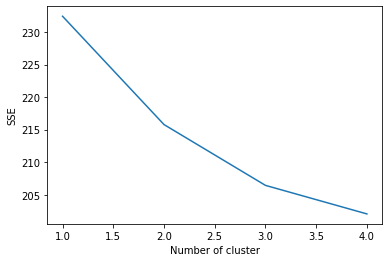

In [52]:
# from sklearn.cluster import KMeans

# sse = {}
# clusters=[]
# for k in range(1, 5):
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(delhi_venue_top_clustering)
#     clusters.append(kmeans.labels_)
#     #print(data["clusters"])
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
# plt.figure()
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.xlabel("Number of cluster")
# plt.ylabel("SSE")
# plt.show()

In [74]:
k_clusters=5

delhi_venue_top_clustering=delhi_venue_freq.drop(['AreaName','District','PinCode','Latitude','Longitude'],axis=1)

k_means=KMeans(n_clusters=k_clusters,random_state=0)
k_means.fit(delhi_venue_top_clustering)

delhi_df_clustered=delhi_venue_freq.loc[:, :'Latitude']
delhi_df_clustered['Cluster']=k_means.labels_

delhi_df_clustered=delhi_df_clustered.join(delhi_venue_top.drop(['District','PinCode','Latitude','Longitude'],1).set_index('AreaName'),on='AreaName')
#sorting freqColumns and Cluster column collectively

delhi_df_clustered=delhi_df_clustered.sort_values(['Cluster']+freqCol).reset_index(drop=True)
delhi_df_clustered

,AreaName,District,PinCode,Longitude,Latitude,Cluster,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue
0,Peeragarhi Village,West District,110087,77.090600,28.676400,0,ATM,Hotel Bar,Train Station,Entertainment Service,Food Truck
1,Mansa Ram Park,West District,110059,77.039019,28.617651,0,ATM,IT Services,Pet Store,Entertainment Service,Food Truck
2,Mansa Ram Park Park Path,West District,110059,77.039019,28.617651,0,ATM,IT Services,Pet Store,Entertainment Service,Food Truck
3,Sainik Nagar Mansa Ram Park,West District,110059,77.039019,28.617651,0,ATM,IT Services,Pet Store,Entertainment Service,Food Truck
4,C Block Janakpuri Road,West District,110058,77.093496,28.620621,0,ATM,Spa,Clothing Store,Fast Food Restaurant,Event Space
5,Deoli Gaon Nai Basti,South District,110062,77.234013,28.505528,0,ATM,Trail,Chinese Restaurant,Entertainment Service,Food Truck
6,Devli Extention Deoli Gaon Nai Basti,South District,110062,77.234013,28.505528,0,ATM,Trail,Chinese Restaurant,Entertainment Service,Food Truck
7,Devli Nai Basti,South District,110062,77.234013,28.505528,0,ATM,Trail,Chinese Restaurant,Entertainment Service,Food Truck
8,Dcm Road,Central District,110007,77.204021,28.662616,0,Afghan Restaurant,Train Station,Yoga Studio,Event Space,Football Stadium
9,B K Dutt Colony,South East Delhi District,110003,77.215914,28.581666,0,Airport,Football Stadium,Antique Shop,Bakery,Yoga Studio


In [75]:
#exporting this dataframe
# delhi_df_clustered.to_csv('delhi_df_clustered.csv')

### Visualizing clusters on Delhi Map

In [78]:
map_clusters=folium.Map(location=[28.644800, 77.216721],zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat,lng,area,pin,dist,cluster in zip(delhi_df_clustered['Latitude'],delhi_df_clustered['Longitude'],delhi_df_clustered['AreaName'],delhi_df_clustered['PinCode'],delhi_df_clustered['District'],delhi_df_clustered['Cluster']) :
    label = folium.Popup('{},({}-{}): Cluster({})'.format(area, pin, dist, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [105]:
delhi_geojson=r'delhi_geojson.json'

In [116]:
m=folium.Map(location=[28.644800, 77.216721],zoom_start=11)
folium.Choropleth(geo_data=delhi_geojson,
                   data=df,
                   columns=['AreaName','AvgPrice'],
                   key_on='geometries.coordinates',
                   fill_color='YlOrRd',
                   fill_opacity=0.7,
                   line_opacity=0.2,
                   legend_name='Housing Prices',
                   reset=True)
folium.LayerControl().add_to(m)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [115]:
m

In [123]:
len(df.PinCode.unique())

89